In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import pytz
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Print available fonts
# fonts = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# for font in fonts:
#     print(font)
# Imposta tutti i font a 12
plt.rcParams.update({'font.size': 16, 'font.family': 'Times'})
plt.rcParams['text.usetex'] = True

# Impostiamo Pandas per stampare tutte le righe e tutte le colonne
pd.set_option('display.max_rows', None)  # Mostra tutte le righe
pd.set_option('display.max_columns', None)  # Mostra tutte le colonne
pd.set_option('display.width', None)  # Rimuove il limite di larghezza della visualizzazione
pd.set_option('display.max_colwidth', None)  # Mostra il contenuto completo delle celle

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


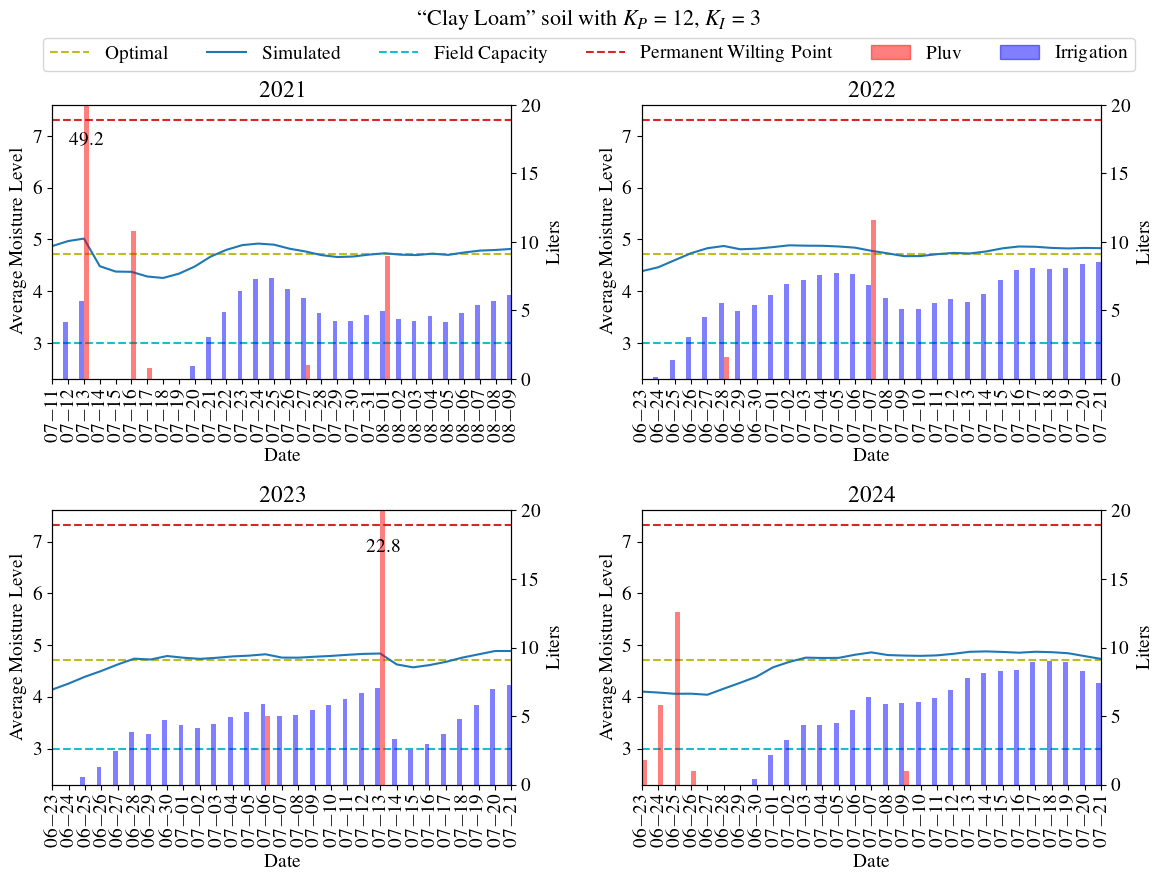

In [27]:
import matplotlib.dates as mdates
from math import log
import matplotlib.dates as mdates

def plot_opt_obs(scenario, df2, ax, legend_elements, y_min, y_max):
    df = df2.copy(deep=True).drop_duplicates(["timestamp","scenario_id"])  # Crea una copia profonda per evitare il SettingWithCopyWarning
    df.sort_values(by=["timestamp"], inplace=True)
    df["timestamp"] = df["timestamp"].apply(lambda x: datetime.fromtimestamp(x))


    # Crea un secondo asse Y per df["delta"] con visualizzazione a barre
    ax2 = ax.twinx()
    bar_width, offset = 0.3, 3.6
    ax2.bar(df["timestamp"] - pd.Timedelta(hours=offset), df["delta"], bar_width, label='Irrigation', color='blue', alpha=0.5)
    ax2.bar(df["timestamp"] + pd.Timedelta(hours=offset), df["daily_pluv"], bar_width, label='Pluv', color='red', alpha=0.5)
    df[df["daily_pluv"] > 20].apply(lambda dff: ax2.text(dff["timestamp"] + pd.Timedelta(hours=offset), 17, dff["daily_pluv"], color='black', ha='center'), axis=1)
    ax2.set_ylabel('Water (L)')
    ax2.tick_params(axis='y')
    ax2.set_ylim([0, 20])


    # Plot delle curve ottimali e osservate sul primo asse Y
    line1, = ax.plot(df["timestamp"], df["opt_avg"], label='Optimal', linestyle='--', color ='C8')
    line2, = ax.plot(df["timestamp"], df["obs_avg"], label='Simulated', color='C0')
    # Definisci l'intervallo sull'asse x convertendo le date in numeri
    x_start = mdates.date2num(df["timestamp"].min())  # Converte la data di inizio
    x_end = mdates.date2num(df["timestamp"].max())    # Converte la data di fine
    line4 = ax.axhline(y=log(20), label='Field Capacity', color='C9', linestyle='--')
    line5 = ax.axhline(y=log(1500), label='Permanent Wilting Point', color='C3', linestyle='--')
    # Imposta etichette e titolo per il primo asse Y
    ax.set_xlabel('Date')
    ax.set_ylabel('Average Moisture Level')
    ax.set_title(f"{scenario}")
    ax.set_ylim([log(10), log(2000)])
    ax.tick_params(axis='y')
    ax.tick_params(axis='x', rotation=90)
    ax.set_xticks(df["timestamp"])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))  # Personalizza il formato della data
    ax.set_xlim([df["timestamp"].min(), df["timestamp"].max()])

    # Aggiungi le linee alla lista della legenda se non sono già presenti
    for line in [line1, line2, line4, line5]:  #line3,
        if line.get_label() not in [elem.get_label() for elem in legend_elements]:
            legend_elements.append(line)

    # Aggiungi una "fake line" per le barre
    import matplotlib.patches as mpatches
    if 'Pluv' not in [elem.get_label() for elem in legend_elements]:
        rect = mpatches.Patch(color='red', alpha=0.5, label='Pluv')
        legend_elements.append(rect)
    if 'Irrigation' not in [elem.get_label() for elem in legend_elements]:
        rect = mpatches.Patch(color='blue', alpha=0.5, label='Irrigation')
        legend_elements.append(rect)
    # Restituisce gli elementi della legenda aggiornata
    return legend_elements

def plot_automl_conf_result(path):
  # Test con dati simulati
  df = pd.read_csv(path)
  scenarios = df["scenario_id"].unique()
  fig, axes = plt.subplots(2, 2, figsize=(12, 9))
  fig.suptitle(f"``Clay Loam'' soil with $K_P$ = {round(df['kp'][0])}, $K_I$ = {df['ki'][0]}")
  axes = axes.flatten()
  min_obs = min(df["obs_avg"])
  min_opt = min(df["opt_avg"])
  max_obs = max(df["obs_avg"])
  max_opt = max(df["opt_avg"])
  legend_elements = []
  for id, scenario in enumerate(scenarios):
      legend_elements = plot_opt_obs(scenario, df.loc[df["scenario_id"] == scenario], axes[id], legend_elements, min([min_obs, min_opt]), max([max_obs, max_opt]))

  # Aggiunge una legenda comune tra il titolo e i grafici in due righe
  fig.legend(legend_elements, [line.get_label() for line in legend_elements], loc='upper center', bbox_to_anchor=(0.5, 0.96), ncol=6)  # ncol=(len(legend_elements) + 1) // 2,  # Calcola automaticamente il numero di colonne per due righe
  plt.tight_layout(rect=[0, 0, 1, 0.97])  # Lascia spazio sufficiente per la legenda
  plt.savefig("/home/results/tuning.svg")
  plt.savefig("/home/results/tuning.pdf")
  plt.show()

plot_automl_conf_result("/home/tuning/errano_soil/run_Kp11.895123021639721_ki3_statistics.csv")

In [28]:
results = pd.read_csv("/home/tuning/errano_soil/summary/summary.csv")
print(f"Worst_scenario:\n {results.loc[results['rmse'] == max(results['rmse'])]}")
print(f"Best_scenario:\n {results.loc[results['rmse'] == min(results['rmse'])]}")

FileNotFoundError: [Errno 2] No such file or directory: '/home/results/errano_soil/summary/summary.csv'